In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
import os
import json

In [ ]:
with open("labels.json" , "r") as f:
    d = json.load(f)

dic = {}

for x in d:
    organ = x.split(",")[0]
    dic[organ] = dic.get(organ , 0)+1
dic

{'Breast': 849,
 'Rectum': 182,
 'Colon': 533,
 'Uterine cervix': 504,
 'Stomach': 849,
 'Prostate': 681,
 'Lung': 784,
 'Urinary bladder': 727}

In [ ]:
path = "files"

all_arr = []
all_filenames = []
all_captions = []

for i in range(1,19):
    array_path = os.path.join(path, f"small{i}.npy")
    filenames_path = os.path.join(path, f"filenames{i}.json")
    captions_path = os.path.join(path, f"captions{i}.json")
    
    arr = np.load(array_path)
    with open(filenames_path, "r") as f:
        filenames = json.load(f)
    with open(captions_path, "r") as f:
        captions = json.load(f)



    all_arr.append(arr)
    all_filenames.extend(filenames)
    all_captions.extend(captions)

    print(arr.shape[0])

In [ ]:


with open("filenames.json", "w") as f:
    json.dump(all_filenames, f , indent=2   )

with open("labels.json", "w") as f:
    json.dump(all_captions, f , indent=2)

final = np.concatenate(all_arr, axis=0)

np.save("images.npy", final)

final.shape, len(all_filenames), len(all_captions)


In [ ]:
with open("labels.json" , "r") as f:
    d = json.load(f)

l = []
for x in d[-100:] :
    l.append(x.split(",")[0])


set(l)

In [ ]:
np.unique(l , return_counts=True)

In [ ]:
organs = [
    'Breast',
    'Colon',
    'Lung',
    'Prostate',
    'Rectum',
    'Stomach',
    'Urinary bladder',
    'Uterine cervix'
]

label_map = {organ: idx for idx, organ in enumerate(organs)}

labels = []

for x in d :
    labels.append(label_map[x.split(",")[0]])

np.unique(labels , return_counts=True)

In [ ]:
np.save("labels.npy" , labels)

In [ ]:
np.shape(labels)

In [ ]:
np.shape(np.load("images.npy"))

In [ ]:
# !pip install scipy 

In [ ]:
def print_dir_tree(start_path, indent=''):
    for item in os.listdir(start_path):
        item_path = os.path.join(start_path, item)
        if os.path.isdir(item_path):
            print(f"{indent}📁 {item}/")
            print_dir_tree(item_path, indent + '    ')
        else:
            print(f"{indent}📄 {item}")

print_dir_tree(".")


Saved plot for Custom CNN (base) as CNN_base_training_plot.png


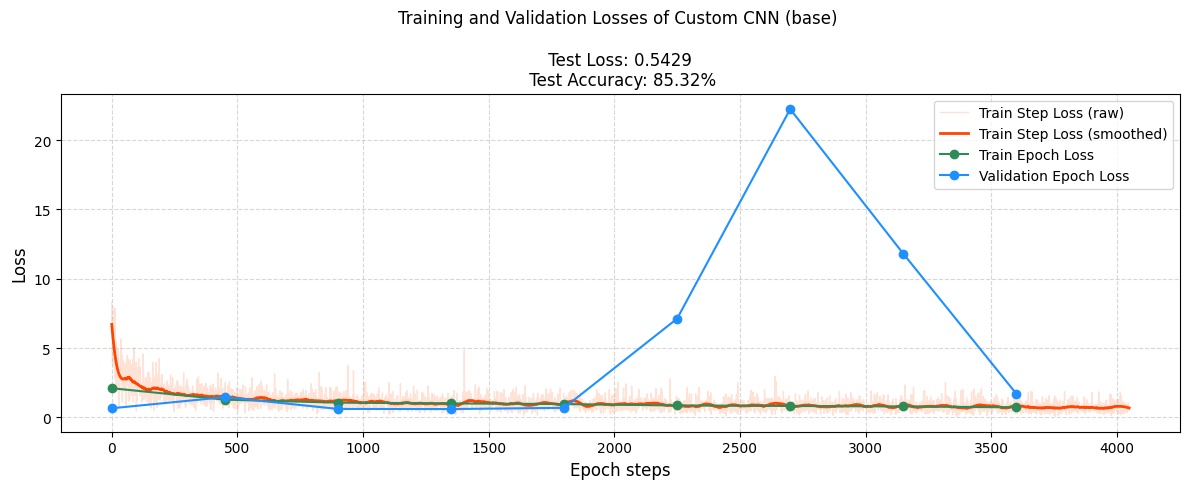

Saved plot for Custom CNN (large) as CNN_large_training_plot.png


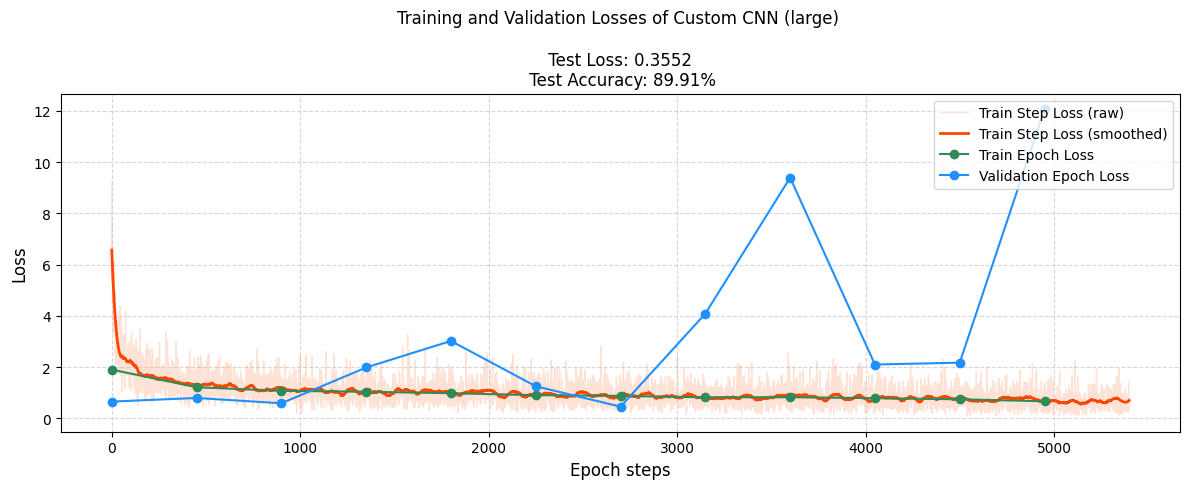

Saved plot for Custom CNN (small) as CNN_small_training_plot.png


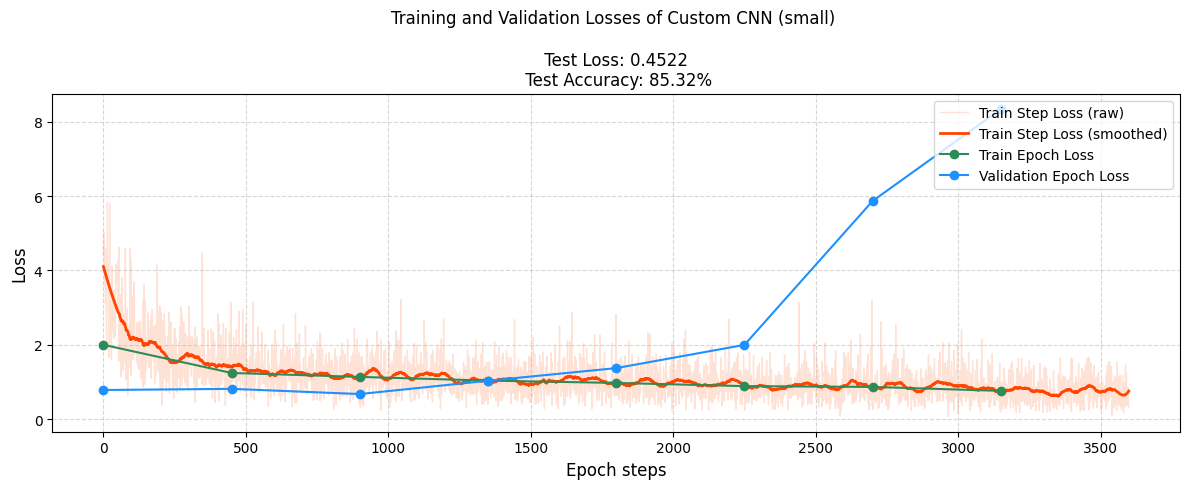

Saved plot for Custom ViT (small) as ViT_small_training_plot.png


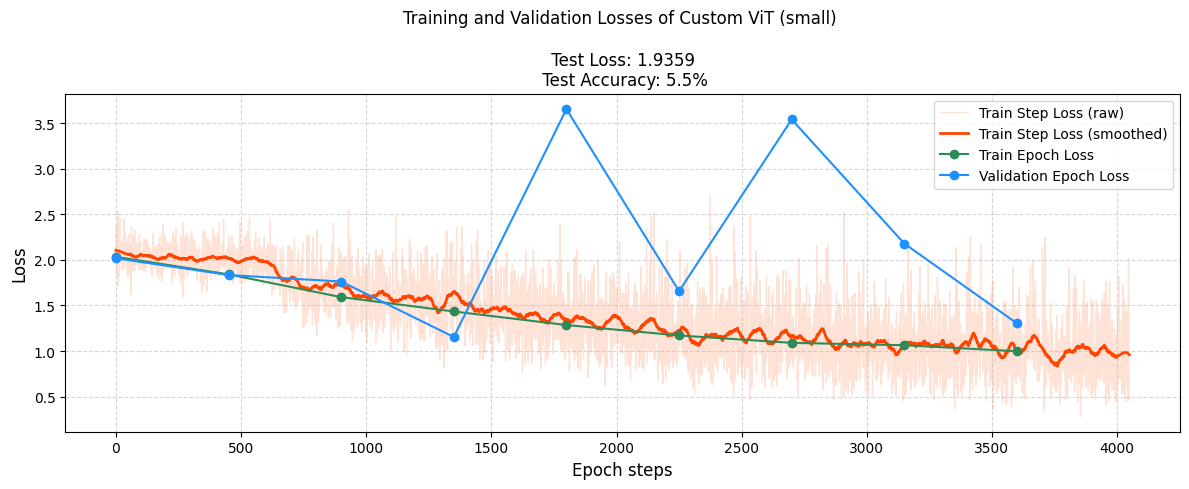

Saved plot for Custom ViT (tiny) as ViT_tiny_training_plot.png


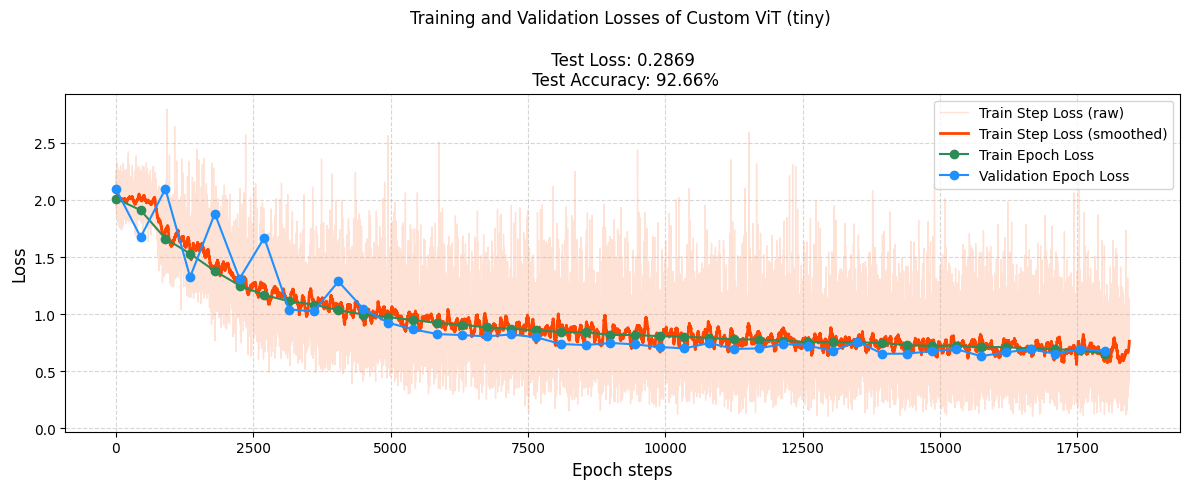

Saved plot for Timm CNN as CNN_timm_training_plot.png


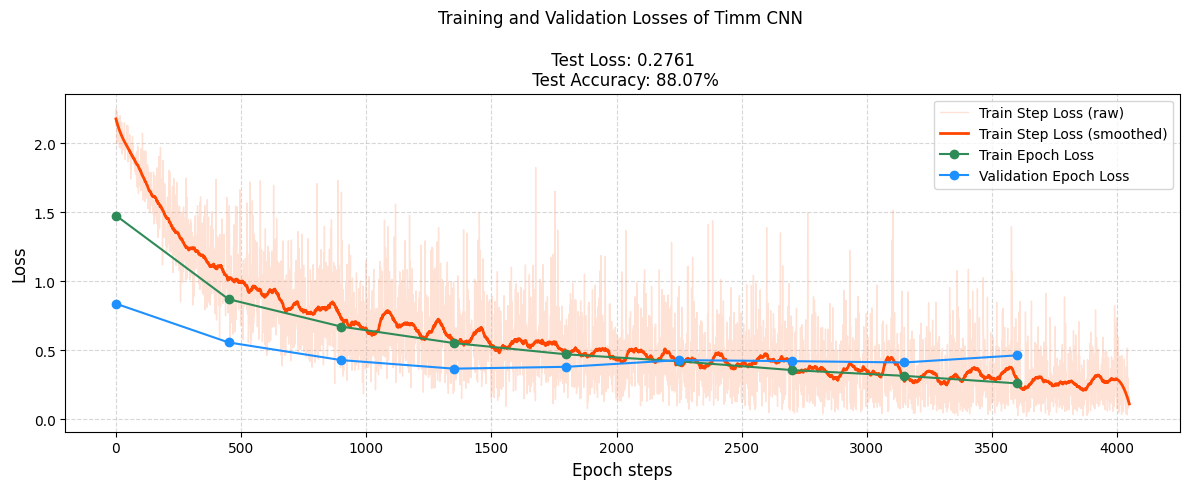

Saved plot for Timm ViT as VIT_timm_training_plot.png


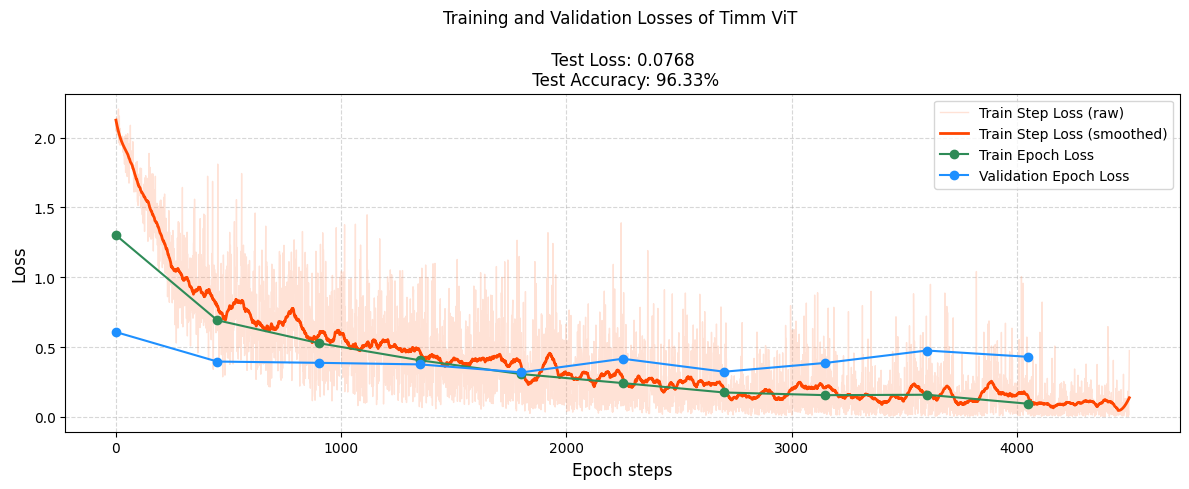

In [ ]:
model_metrics = [
    {'Model': 'Timm ViT', 'Test_Accuracy_%': 96.33, 'Test_Loss': 0.0768},
    {'Model': 'Timm CNN', 'Test_Accuracy_%': 88.07, 'Test_Loss': 0.2761},
    {'Model': 'Custom CNN (small)', 'Test_Accuracy_%': 85.32, 'Test_Loss': 0.4522},
    {'Model': 'Custom CNN (base)', 'Test_Accuracy_%': 85.32, 'Test_Loss': 0.5429},
    {'Model': 'Custom CNN (large)', 'Test_Accuracy_%': 89.91, 'Test_Loss': 0.3552},
    {'Model': 'Custom ViT (tiny)', 'Test_Accuracy_%': 92.66, 'Test_Loss': 0.2869},
    {'Model': 'Custom ViT (small)', 'Test_Accuracy_%': 5.50, 'Test_Loss': 1.9359}
]

model_mapping = {
    'CNN_base': ('Custom CNN (base)', 85.32, 0.5429),
    'CNN_large': ('Custom CNN (large)', 89.91, 0.3552),
    'CNN_small': ('Custom CNN (small)', 85.32, 0.4522),
    'ViT_small': ('Custom ViT (small)', 5.50, 1.9359),
    'ViT_tiny': ('Custom ViT (tiny)', 92.66, 0.2869),
    'CNN_timm': ('Timm CNN', 88.07, 0.2761),
    'VIT_timm': ('Timm ViT', 96.33, 0.0768)
}

colors = {
    "raw_step": "#FFA07A",
    "smooth_step": "#FF4500",
    "train_epoch": "#2E8B57",
    "val_epoch": "#1E90FF",
}

steps_per_epoch = 450

for main_dir in ['CUSTOM', 'TIMM']:
    if not os.path.exists(main_dir):
        continue
        
    for model_folder in os.listdir(main_dir):
        model_path = os.path.join(main_dir, model_folder)
        if not os.path.isdir(model_path):
            continue
            
        if model_folder not in model_mapping:
            continue
            
        display_name, test_acc, test_loss = model_mapping[model_folder]
        
        suffix = "_scratch" if main_dir == "CUSTOM" else ""
        
        train_epoch_file = os.path.join(model_path, f"train_epoch_losses_{model_folder.lower()}{suffix}.npy")
        train_step_file = os.path.join(model_path, f"train_step_losses_{model_folder.lower()}{suffix}.npy")
        val_epoch_file = os.path.join(model_path, f"val_epoch_losses_{model_folder.lower()}{suffix}.npy")
        
        if not all(os.path.exists(f) for f in [train_epoch_file, train_step_file, val_epoch_file]):
            print(f"Missing files for {model_folder}, skipping...")
            continue
            
        train_epochs = np.load(train_epoch_file)
        train_steps = np.load(train_step_file)
        val_epoch = np.load(val_epoch_file)
        
        num_epochs = len(train_epochs)
        step_x = np.arange(len(train_steps))
        epoch_x = np.arange(num_epochs) * steps_per_epoch
        
        train_steps_smooth = savgol_filter(train_steps, window_length=101, polyorder=3)
        
        plt.figure(figsize=(12, 5))
        
        plt.plot(step_x, train_steps, label='Train Step Loss (raw)', color=colors["raw_step"], alpha=0.3, linewidth=1)
        plt.plot(step_x, train_steps_smooth, label='Train Step Loss (smoothed)', color=colors["smooth_step"], linewidth=2)
        
        plt.plot(epoch_x, train_epochs, "-o", label='Train Epoch Loss', color=colors["train_epoch"], markersize=6)
        plt.plot(epoch_x, val_epoch, "-o", label='Validation Epoch Loss', color=colors["val_epoch"], markersize=6)
        
        plt.legend(loc='upper right', fontsize=10)
        plt.xlabel('Epoch steps', fontsize=12)
        plt.ylabel('Loss', fontsize=12)
        plt.title(f'Training and Validation Losses of {display_name} \n\n Test Loss: {test_loss} \n Test Accuracy: {test_acc}%')
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.tight_layout()
        
        save_filename = f"{model_folder}_training_plot.png"
        plt.savefig(save_filename, dpi=300, bbox_inches='tight')
        print(f"Saved plot for {display_name} as {save_filename}")
        
        plt.show()


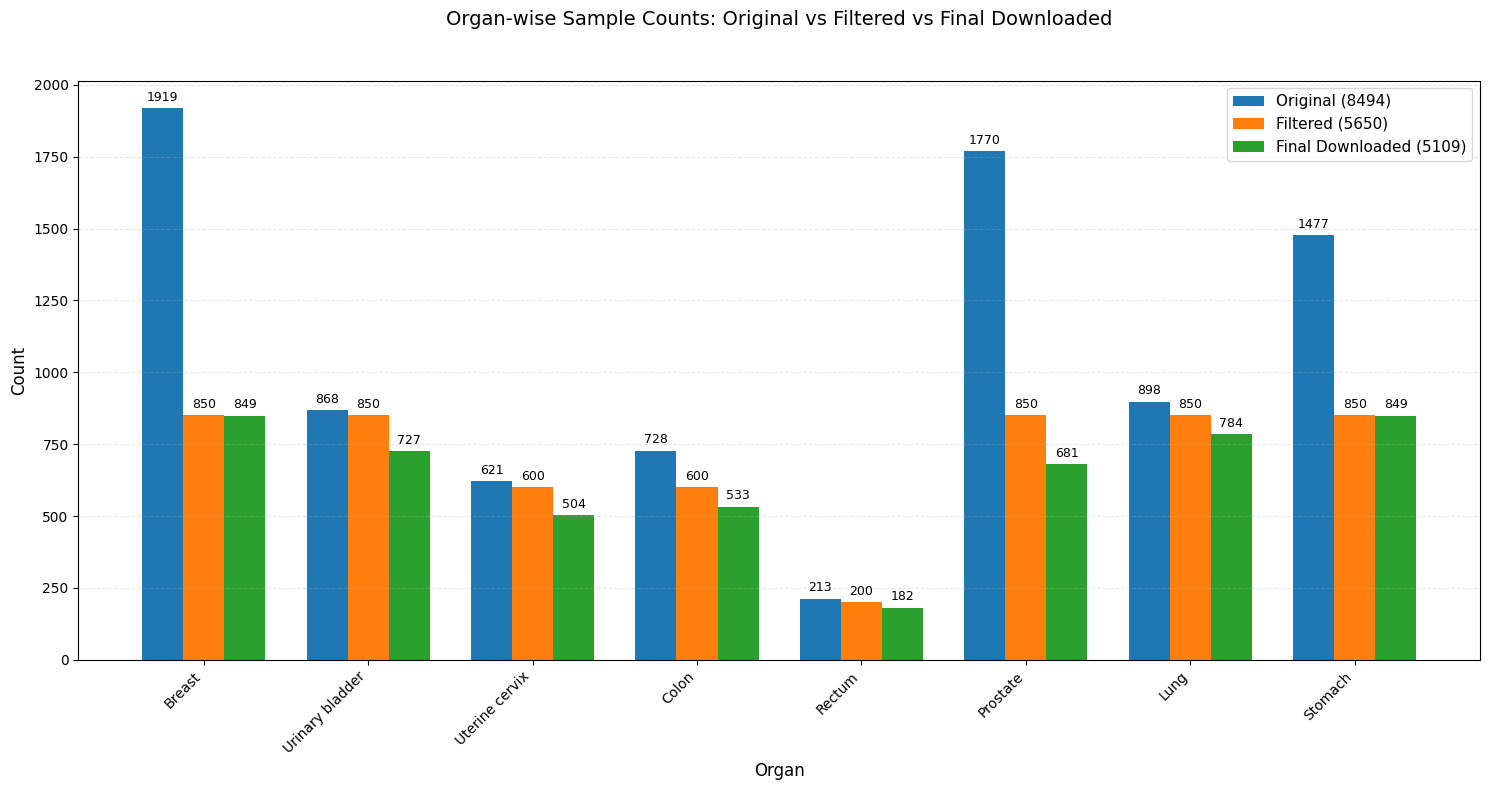

In [27]:
original_count = {
    'Breast': 1919,
    'Urinary bladder': 868,
    'Uterine cervix': 621,
    'Colon': 728,
    'Rectum': 213,
    'Prostate': 1770,
    'Lung': 898,
    'Stomach': 1477
}

filtered_count = {
    'Breast': 850,
    'Urinary bladder': 850,
    'Uterine cervix': 600,
    'Colon': 600,
    'Rectum': 200,
    'Prostate': 850,
    'Lung': 850,
    'Stomach': 850
}

final_downloaded_count = {
    'Breast': 849,
    'Urinary bladder': 727,
    'Uterine cervix': 504,
    'Colon': 533,
    'Rectum': 182,
    'Prostate': 681,
    'Lung': 784,
    'Stomach': 849
}

organs = list(original_count.keys())

original_vals = [original_count[o] for o in organs]
filtered_vals = [filtered_count[o] for o in organs]
final_vals = [final_downloaded_count[o] for o in organs]

total_original = sum(original_vals)
total_filtered = sum(filtered_vals)
total_final = sum(final_vals)

x = range(len(organs))
bar_width = 0.25

fig, ax = plt.subplots(figsize=(15, 8))

bars1 = ax.bar([i - bar_width for i in x], original_vals, width=bar_width,
               label=f'Original ({total_original})', color='#1f77b4')
bars2 = ax.bar(x, filtered_vals, width=bar_width,
               label=f'Filtered ({total_filtered})', color='#ff7f0e')
bars3 = ax.bar([i + bar_width for i in x], final_vals, width=bar_width,
               label=f'Final Downloaded ({total_final})', color='#2ca02c')

for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2.0, height + 15, f'{int(height)}',
                ha='center', va='bottom', fontsize=9)

ax.set_xticks(x)
ax.set_xticklabels(organs, rotation=45, ha='right')

ax.set_xlabel('Organ', fontsize=12)
ax.set_ylabel('Count', fontsize=12)

ax.set_title('Organ-wise Sample Counts: Original vs Filtered vs Final Downloaded', 
             fontsize=14, pad=40)

ax.legend(loc='upper right', fontsize=11)

ax.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

In [8]:
np.shape(train_losses)

(5000,)

Saved plot for bfloat16 LLM as _training_step_loss_plot.png


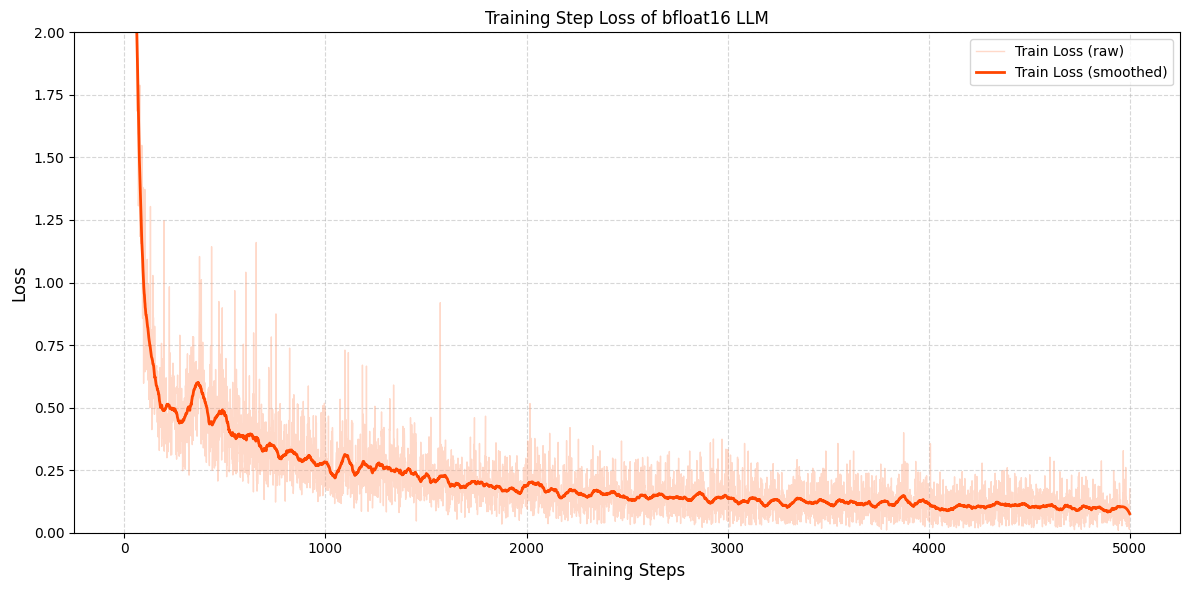

In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

train_losses = np.load('./PLOTS/LLM/BFLOAT16MODEL/step_train_losses.npy')

num_steps = len(train_losses)
step_x = np.arange(num_steps)

train_losses_smooth = savgol_filter(train_losses, window_length=101, polyorder=3)

colors = {
    "raw_step": "#FFA07A",
    "smooth_step": "#FF4500"
}

plt.figure(figsize=(12, 6))

plt.plot(step_x, train_losses, label='Train Loss (raw)', color=colors["raw_step"], alpha=0.4, linewidth=1)
plt.plot(step_x, train_losses_smooth, label='Train Loss (smoothed)', color=colors["smooth_step"], linewidth=2)

plt.ylim(0, 2)

plt.xlabel('Training Steps', fontsize=12)
plt.ylabel('Loss', fontsize=12)
display_name = "bfloat16 LLM"
plt.title(f'Training Step Loss of {display_name}')
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

model_folder = "./PLOTS/LLM/BFLOAT16MODEL"
save_filename = "_training_step_loss_plot.png"
plt.savefig(save_filename, dpi=300, bbox_inches='tight')
print(f"Saved plot for {display_name} as {save_filename}")
plt.show()


Saved plot as training_losses_plot.png


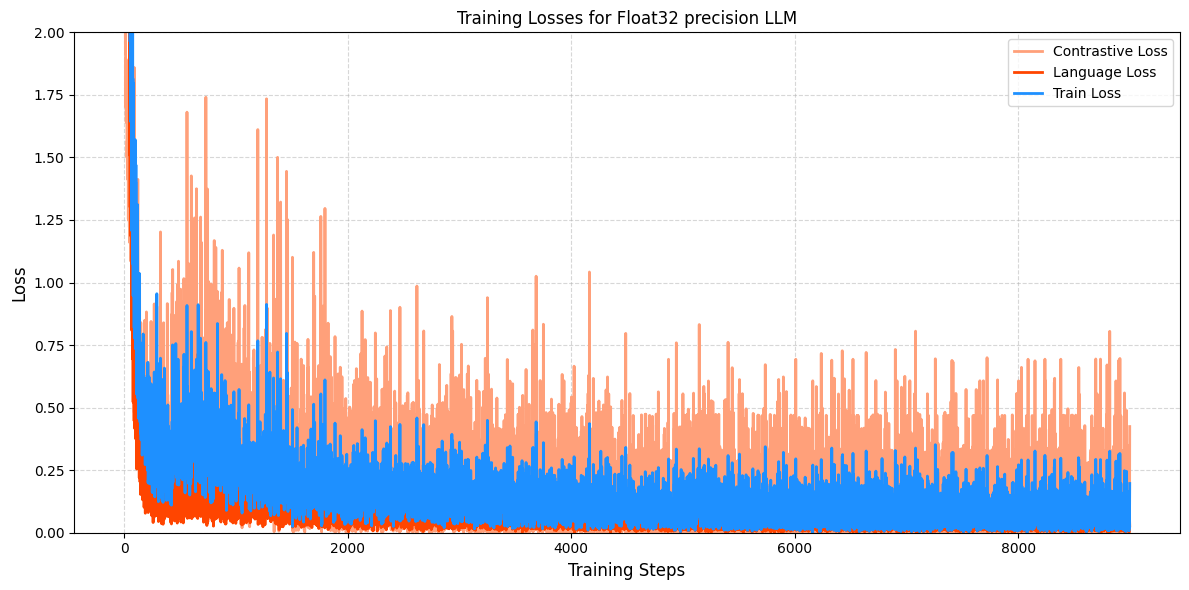

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import os

# File paths
contrastive_loss_path = "./PLOTS/LLM/FLOAT32MODEL/step_contrastive_losses.npy"
language_loss_path = "./PLOTS/LLM/FLOAT32MODEL/step_language_losses.npy"
train_loss_path = "./PLOTS/LLM/FLOAT32MODEL/step_train_losses.npy"

# Color scheme
colors = {
    "contrastive": "#FFA07A",
    "language": "#FF4500", 
    "train": "#1E90FF"
}

steps_per_epoch = 500

# Check if files exist
file_paths = [contrastive_loss_path, language_loss_path, train_loss_path]
file_names = ["Contrastive Loss", "Language Loss", "Train Loss"]

if not all(os.path.exists(f) for f in file_paths):
    print("Some files are missing!")
    for i, path in enumerate(file_paths):
        if not os.path.exists(path):
            print(f"Missing: {path}")
else:
    # Load data
    contrastive_losses = np.load(contrastive_loss_path)
    language_losses = np.load(language_loss_path)
    train_losses = np.load(train_loss_path)
    
    # Calculate x-axis values (steps)
    contrastive_x = np.arange(len(contrastive_losses))
    language_x = np.arange(len(language_losses))
    train_x = np.arange(len(train_losses))
    
    # Create plot
    plt.figure(figsize=(12, 6))
    
    # Plot losses
    plt.plot(contrastive_x, contrastive_losses, label='Contrastive Loss', 
             color=colors["contrastive"], linewidth=2)
    
    plt.plot(language_x, language_losses, label='Language Loss', 
             color=colors["language"], linewidth=2)
    
    plt.plot(train_x, train_losses, label='Train Loss', 
             color=colors["train"], linewidth=2)
    
    plt.ylim(0, 2)  
    plt.legend(loc='upper right', fontsize=10)
    plt.xlabel('Training Steps', fontsize=12)
    plt.ylabel('Loss', fontsize=12)
    plt.title('Training Losses for Float32 precision LLM')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    
    save_filename = "training_losses_plot.png"
    plt.savefig(save_filename, dpi=300, bbox_inches='tight')
    print(f"Saved plot as {save_filename}")
    
    plt.show()